# Assignment 5.1
## Binary Classifier
### Rebecca Lewis

In [1]:
import numpy as np

In [2]:
#load the imdb dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
#validated training and testing sets
#train_data[0]
#train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [4]:
#decode review back to English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
#encode the integer dequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
#validate 
#x_train[0]

In [8]:
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
#implement the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#to configure optimization or loss parameters
# import keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# import keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss=losses.binary_crossentropy,
#              metrics=['accuracy'])

In [10]:
#set aside validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
#train the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))



Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5075 - acc: 0.7884 - val_loss: 0.3838 - val_acc: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3001 - acc: 0.9045 - val_loss: 0.3262 - val_acc: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2196 - acc: 0.9286 - val_loss: 0.2761 - val_acc: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1754 - acc: 0.9428 - val_loss: 0.2729 - val_acc: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1398 - acc: 0.9563 - val_loss: 0.3051 - val_acc: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1174 - acc: 0.9623 - val_loss: 0.2995 - val_acc: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0961 - acc: 0.9711 - val_loss: 0.3334 - val_acc: 0.8776
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0797 - a

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

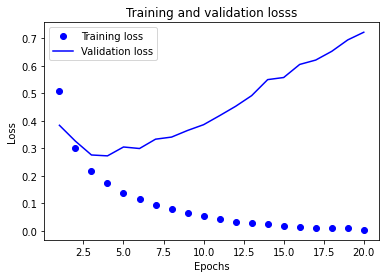

In [13]:
#plot the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

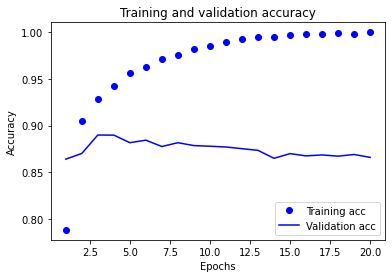

In [14]:
#plot the training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
#retraining from scratch on 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4657 - accuracy: 0.8248
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2681 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2041 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2934 - accuracy: 0.8850


In [16]:
model.predict(x_test)

array([[0.21150035],
       [0.99972636],
       [0.7833364 ],
       ...,
       [0.10918015],
       [0.06057188],
       [0.53854114]], dtype=float32)

In [17]:
#experiment with three hidden layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.4558 - accuracy: 0.8107
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2444 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1909 - accuracy: 0.9325
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.8799


In [18]:
#this does not perform as well as two hidden layers  - try one
#experiment with three hidden layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4406 - accuracy: 0.8291
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2712 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2151 - accuracy: 0.9263
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2855 - accuracy: 0.8838


In [19]:
#performance is slightly better
#using this number of layers alter units
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4261 - accuracy: 0.8187
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2518 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2015 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8821


In [20]:
#performance is not improved
#try mse loss function

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mean_squared_error',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1555 - accuracy: 0.8294
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0905 - accuracy: 0.9039
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9229
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.8896


In [21]:
#performance is not improved - try tanh activation
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 7ms/step - loss: 0.4442 - accuracy: 0.8307
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2740 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2142 - accuracy: 0.9270
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.8863


# Assignment 5.2
## Multiclassifier Example
### Rebecca Lewis

In [22]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

len(train_data), len(test_data)

(8982, 2246)

In [23]:
#decode back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

3

In [25]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
#one hot encoding example for labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#keras built in function
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [27]:
#model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.6112 - accuracy: 0.5331 - val_loss: 1.6936 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3830 - accuracy: 0.7119 - val_loss: 1.2778 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0216 - accuracy: 0.7783 - val_loss: 1.1165 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8055 - accuracy: 0.8281 - val_loss: 1.0241 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6451 - accuracy: 0.8639 - val_loss: 0.9548 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5134 - accuracy: 0.8924 - val_loss: 0.9151 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4185 - accuracy: 0.9121 - val_loss: 0.8997 - val_accuracy: 0.8100
Epoch 8/20
16

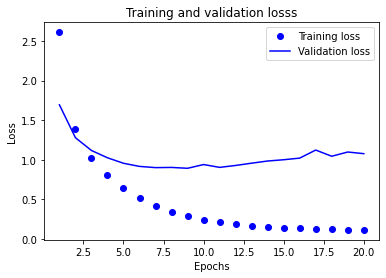

In [30]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

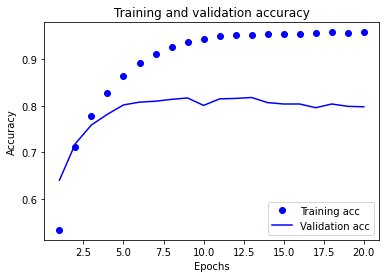

In [31]:
#plot the training and validation accuracy
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
#retrain the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.6492 - accuracy: 0.5371 - val_loss: 1.7450 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.4068 - accuracy: 0.7167 - val_loss: 1.2937 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0193 - accuracy: 0.7848 - val_loss: 1.1172 - val_accuracy: 0.7630
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.7941 - accuracy: 0.8311 - val_loss: 1.0176 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6344 - accuracy: 0.8652 - val_loss: 0.9467 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5079 - accuracy: 0.8955 - val_loss: 0.9302 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4160 - accuracy: 0.9117 - val_loss: 0.9000 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [34]:
results

[0.9909918904304504, 0.784060537815094]

In [35]:
#generating predictions for new data
predictions = model.predict(x_test)

predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.9999999

In [37]:
np.argmax(predictions[0])

3

# Assignment 5.3
## Regression Example

### Rebecca Lewis

In [71]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape, test_data.shape

((404, 13), (102, 13))

In [72]:
#normalize the data
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [73]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [74]:
#set up k-fold validation
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
        train_data[(i+1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
        train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [75]:
all_scores

[2.288649082183838, 3.0874688625335693, 2.7066917419433594, 2.5108232498168945]

In [76]:
np.mean(all_scores)

2.6484082341194153

In [77]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [78]:
#modify k fold for saving the history
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], 
        train_data[(i+1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], 
        train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [79]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [80]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

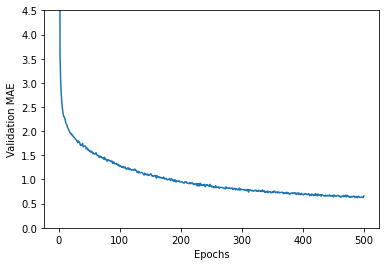

In [82]:
# plot validation scores
plt.clf
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim(0,4.5)
plt.show()

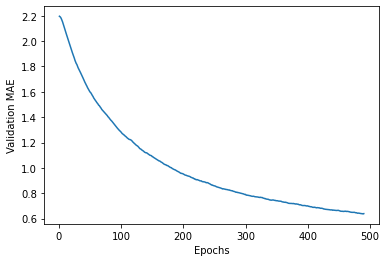

In [85]:
#modify plot
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [86]:
#train the final model
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 19.8521 - mae: 2.8411


In [87]:
test_mae_score

2.841092586517334